In [1]:
using Pkg
Pkg.activate("../")
#Pkg.instantiate()

  Activating project at `~/Documents/UCL/3x2_analytical`


In [2]:
using LinearAlgebra
using ForwardDiff
using Plots
using LimberJack
using CSV
using YAML
using NPZ
using DataFrames
using PythonCall
using Statistics
using Interpolations
using SparseArrays
sacc = pyimport("sacc");

# Judith's Chain

In [3]:
#using DelimitedFiles
#chain = readdlm("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/cosmodc2_3x2pt_fourier_lcdm.txt");

In [4]:
#chain_vals = chain[200:end, :]
#param_names = chain[1, :];

#post = chain_vals[:, 32]
#index_of_min = argmax(post)
#row_with_min = chain_vals[index_of_min, :]
#Wm = row_with_min[1]+row_with_min[2]
#Wb = row_with_min[2]
#h0 = row_with_min[5]
#ns = row_with_min[3]
#s8 = row_with_min[29]
#best_params = [Wm, Wb, h0, s8, ns]
#print(best_params)

#nuisances = Dict(
#    "lens_0_b" => row_with_min[13],
#    "lens_1_b" => row_with_min[14],
#    "lens_2_b" => row_with_min[15],
#    "lens_3_b" => row_with_min[16],
#    "lens_4_b" => row_with_min[17],
#    "source_0_m" => row_with_min[8],
#    "source_1_m" => row_with_min[9],
#    "source_2_m" => row_with_min[10],
#    "source_3_m" => row_with_min[11],
#    "source_4_m" => row_with_min[12])

In [5]:
function make_Cmod(m, model)
    T = ForwardDiff.jacobian(model, zeros(m))
    return T * T'
end

make_Cmod (generic function with 1 method)

## Data

In [6]:
method = "bpz"
sacc_path = "../data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc"
yaml_path = "../data/CosmoDC2/gcgc_gcwl_wlwl_aggresive.yml"
nz_path = string("../data/CosmoDC2/image_gp_", method, "_priors/")

sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)

nz_lens_0 = npzread(string(nz_path, "gp_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "gp_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "gp_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "gp_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "gp_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "gp_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "gp_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "gp_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "gp_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "gp_source_4.npz"))

zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

mu_k0 = sum(zs_k0 .* nz_k0) / sum(nz_k0)
mu_k1 = sum(zs_k1 .* nz_k1) / sum(nz_k1)
mu_k2 = sum(zs_k2 .* nz_k2) / sum(nz_k2)
mu_k3 = sum(zs_k3 .* nz_k3) / sum(nz_k3)
mu_k4 = sum(zs_k4 .* nz_k4) / sum(nz_k4)
mu_k5 = sum(zs_k5 .* nz_k5) / sum(nz_k5)
mu_k6 = sum(zs_k6 .* nz_k6) / sum(nz_k6)
mu_k7 = sum(zs_k7 .* nz_k7) / sum(nz_k7)
mu_k8 = sum(zs_k8 .* nz_k8) / sum(nz_k8)
mu_k9 = sum(zs_k9 .* nz_k9) / sum(nz_k9)

meta_3x2, files_3x2 = make_data(sacc_file, yaml_file;
    nz_lens_0=nz_lens_0,
    nz_lens_1=nz_lens_1,
    nz_lens_2=nz_lens_2,
    nz_lens_3=nz_lens_3,
    nz_lens_4=nz_lens_4,
    nz_source_0=nz_source_0,
    nz_source_1=nz_source_1,
    nz_source_2=nz_source_2,
    nz_source_3=nz_source_3,
    nz_source_4=nz_source_4)

meta_3x2.types = [ 
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_shear", 
    "galaxy_shear", 
    "galaxy_shear",
    "galaxy_shear",
    "galaxy_shear"]

lens_0 lens_0 8
lens_1 lens_1 9
lens_2 lens_2 10
lens_3 lens_3 11
lens_4 lens_4 11
source_0 lens_0 8
source_0 lens_1 9
source_0 lens_2 10
source_0 lens_3 11
source_0 lens_4 11
source_1 lens_0 8
source_1 lens_1 9
source_1 lens_2 10
source_1 lens_3 11
source_1 lens_4 11
source_2 lens_0 8
source_2 lens_1 9
source_2 lens_2 10
source_2 lens_3 11
source_2 lens_4 11
source_3 lens_0 8
source_3 lens_1 9
source_3 lens_2 10
source_3 lens_3 11
source_3 lens_4 11
source_4 lens_0 8
source_4 lens_1 9
source_4 lens_2 10
source_4 lens_3 11
source_4 lens_4 11
source_0 source_0 14
source_1 source_0 14
source_1 source_1 14
source_2 source_0 14
source_2 source_1 14
source_2 source_2 14
source_3 source_0 14
source_3 source_1 14
source_3 source_2 14
source_3 source_3 14
source_4 source_0 14
source_4 source_1 14
source_4 source_2 14
source_4 source_3 14
source_4 source_4 14
using custom nz for nz_source_0
using custom nz for nz_source_1
using custom nz for nz_source_2
using custom nz for nz_source_3
using cus

10-element Vector{String}:
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"

## DZ

In [7]:
dz_path = string("../data/CosmoDC2/image_dz_", method, "_priors/dz_prior.npz")
dz_prior = npzread(dz_path)
dz_mean_3x2 = dz_prior["mean"]
dz_chol_3x2 = dz_prior["chol"]

10×10 Matrix{Float64}:
 0.073482      0.0          0.0          …  0.0          0.0
 0.0678409     0.00440199   0.0             0.0          0.0
 0.0533429     0.00277415   0.0043309       0.0          0.0
 0.0514771     0.00513125   0.00211765      0.0          0.0
 0.123254     -0.000679035  0.0159639       0.0          0.0
 0.000794405   0.00101283   0.00084161   …  0.0          0.0
 0.000698336   0.000837698  0.000673307     0.0          0.0
 0.0005941     0.000715175  0.000593519     0.0          0.0
 0.000549005   0.000657695  0.00053243      9.35366e-5   0.0
 0.000499113   0.000635934  0.000520262     0.000359667  0.000243523

In [8]:
function model_dz(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    A_IA=0.25179439,
    meta=meta_3x2, files=files_3x2)

    dzs = dz_mean_3x2 .+ dz_chol_3x2 * alphas
    wzs = ones(10)
    lens_0_zs   = @.((zs_k0-mu_k0)/wzs[1] + mu_k0 + dzs[1])
    lens_1_zs   = @.((zs_k1-mu_k1)/wzs[2] + mu_k1 + dzs[2])
    lens_2_zs   = @.((zs_k2-mu_k2)/wzs[3] + mu_k2 + dzs[3])
    lens_3_zs   = @.((zs_k3-mu_k3)/wzs[4] + mu_k3 + dzs[4])
    lens_4_zs   = @.((zs_k4-mu_k4)/wzs[5] + mu_k4 + dzs[5])
    source_0_zs = @.((zs_k5-mu_k5)/wzs[6] + mu_k5 + dzs[6])
    source_1_zs = @.((zs_k6-mu_k6)/wzs[7] + mu_k6 + dzs[7])
    source_2_zs = @.((zs_k7-mu_k7)/wzs[8] + mu_k7 + dzs[8])
    source_3_zs = @.((zs_k8-mu_k8)/wzs[9] + mu_k8 + dzs[9])
    source_4_zs = @.((zs_k9-mu_k9)/wzs[10] + mu_k9 + dzs[10])

    nuisances = Dict(
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_5_b"    => lens_5_b,
        "lens_0_zs"   => lens_0_zs,
        "lens_1_zs"   => lens_1_zs,
        "lens_2_zs"   => lens_2_zs,
        "lens_3_zs"   => lens_3_zs,
        "lens_4_zs"   => lens_4_zs,
        "source_0_zs" => source_0_zs,
        "source_1_zs" => source_1_zs,
        "source_2_zs" => source_2_zs,
        "source_3_zs" => source_3_zs,
        "source_4_zs" => source_4_zs,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [9]:
Cmod_dz = make_Cmod(10, model_dz);

## WZDZ

In [10]:
wzdz_path = string("../data/CosmoDC2/image_wzdz_", method, "_priors/wzdz_prior.npz")
wzdz_prior = npzread(wzdz_path)
wzdz_mean_3x2 = wzdz_prior["mean"] 
wzdz_chol_3x2 = wzdz_prior["chol"]

20×20 Matrix{Float64}:
  0.073482      0.0           0.0          …  0.0          0.0
  0.090385      0.0163551     0.0             0.0          0.0
  0.0678409    -0.00217081    0.0038295       0.0          0.0
  0.0715285     0.00878478   -0.0166882       0.0          0.0
  0.0533429    -0.00490762    0.000406907     0.0          0.0
  0.125534     -0.003725     -0.107768     …  0.0          0.0
  0.0514771    -0.00446889    0.00336508      0.0          0.0
  0.0216091    -0.0119169    -0.0400412       0.0          0.0
  0.123254     -0.0132118    -0.00826985      0.0          0.0
  0.0506982    -0.0125975    -0.0447845       0.0          0.0
  0.000794405  -0.000911369   0.000647623  …  0.0          0.0
  0.00130355   -0.00185029    0.000827397     0.0          0.0
  0.000698336  -0.000720433   0.00055454      0.0          0.0
 -0.00182776    0.00120099   -0.0012173       0.0          0.0
  0.0005941    -0.000635604   0.000461788     0.0          0.0
 -0.000804854   0.000654059  -0.

In [11]:
function model_wzdz(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    A_IA=0.25179439,
    meta=meta_3x2, files=files_3x2)

    SnWs = wzdz_mean_3x2 .+ wzdz_chol_3x2 * alphas
    dzs = [SnWs[1], SnWs[3], SnWs[5], SnWs[7], SnWs[9],
           SnWs[11], SnWs[13], SnWs[15], SnWs[17], SnWs[19]]
    wzs = [SnWs[2], SnWs[4], SnWs[6], SnWs[8], SnWs[10],
           SnWs[12], SnWs[14], SnWs[16], SnWs[18], SnWs[20]]
    lens_0_zs   = @.((zs_k0-mu_k0)/wzs[1] + dzs[1]/wzs[1] + mu_k0)
    lens_1_zs   = @.((zs_k1-mu_k1)/wzs[2] + dzs[2]/wzs[2] + mu_k1)
    lens_2_zs   = @.((zs_k2-mu_k2)/wzs[3] + dzs[3]/wzs[3] + mu_k2)
    lens_3_zs   = @.((zs_k3-mu_k3)/wzs[4] + dzs[4]/wzs[4] + mu_k3)
    lens_4_zs   = @.((zs_k4-mu_k4)/wzs[5] + dzs[5]/wzs[5] + mu_k4)
    source_0_zs = @.((zs_k5-mu_k5)/wzs[6] + dzs[6]/wzs[6] + mu_k5)
    source_1_zs = @.((zs_k6-mu_k6)/wzs[7] + dzs[7]/wzs[7] + mu_k6)
    source_2_zs = @.((zs_k7-mu_k7)/wzs[8] + dzs[8]/wzs[8] + mu_k7)
    source_3_zs = @.((zs_k8-mu_k8)/wzs[9] + dzs[9]/wzs[9] + mu_k8)
    source_4_zs = @.((zs_k9-mu_k9)/wzs[10] + dzs[10]/wzs[10] + mu_k9)

    nuisances = Dict(
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_5_b"    => lens_5_b,
        "lens_0_zs"   => lens_0_zs,
        "lens_1_zs"   => lens_1_zs,
        "lens_2_zs"   => lens_2_zs,
        "lens_3_zs"   => lens_3_zs,
        "lens_4_zs"   => lens_4_zs,
        "source_0_zs" => source_0_zs,
        "source_1_zs" => source_1_zs,
        "source_2_zs" => source_2_zs,
        "source_3_zs" => source_3_zs,
        "source_4_zs" => source_4_zs,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [12]:
Cmod_wzdz = make_Cmod(20, model_wzdz);

## PCA

In [13]:
PCA_path = string("../data/CosmoDC2/image_PCA_", method, "_priors/")
PCA_source_0 = npzread(string(PCA_path, "PCA_source_0.npz"))
PCA_source_1 = npzread(string(PCA_path, "PCA_source_1.npz"))
PCA_source_2 = npzread(string(PCA_path, "PCA_source_2.npz"))
PCA_source_3 = npzread(string(PCA_path, "PCA_source_3.npz"))
PCA_source_4 = npzread(string(PCA_path, "PCA_source_4.npz"))
PCA_lens_0 = npzread(string(PCA_path, "PCA_lens_0.npz"))
PCA_lens_1 = npzread(string(PCA_path, "PCA_lens_1.npz"))
PCA_lens_2 = npzread(string(PCA_path, "PCA_lens_2.npz"))
PCA_lens_3 = npzread(string(PCA_path, "PCA_lens_3.npz"))
PCA_lens_4 = npzread(string(PCA_path, "PCA_lens_4.npz"))

PCA_eigvec_source_0 = PCA_source_0["eigvecs"]
PCA_eigvec_source_1 = PCA_source_1["eigvecs"]
PCA_eigvec_source_2 = PCA_source_2["eigvecs"]
PCA_eigvec_source_3 = PCA_source_3["eigvecs"]
PCA_eigvec_source_4 = PCA_source_4["eigvecs"]
PCA_eigvec_lens_0 = PCA_lens_0["eigvecs"]
PCA_eigvec_lens_1 = PCA_lens_1["eigvecs"]
PCA_eigvec_lens_2 = PCA_lens_2["eigvecs"]
PCA_eigvec_lens_3 = PCA_lens_3["eigvecs"]
PCA_eigvec_lens_4 = PCA_lens_4["eigvecs"]

PCA_mean_source_0 = PCA_source_0["mean"]
PCA_mean_source_1 = PCA_source_1["mean"]
PCA_mean_source_2 = PCA_source_2["mean"]
PCA_mean_source_3 = PCA_source_3["mean"]
PCA_mean_source_4 = PCA_source_4["mean"]
PCA_mean_lens_0 = PCA_lens_0["mean"]
PCA_mean_lens_1 = PCA_lens_1["mean"]
PCA_mean_lens_2 = PCA_lens_2["mean"]
PCA_mean_lens_3 = PCA_lens_3["mean"]
PCA_mean_lens_4 = PCA_lens_4["mean"]

PCA_chol_source_0 = PCA_source_0["chol"]
PCA_chol_source_1 = PCA_source_1["chol"]
PCA_chol_source_2 = PCA_source_2["chol"]
PCA_chol_source_3 = PCA_source_3["chol"]
PCA_chol_source_4 = PCA_source_4["chol"]
PCA_chol_lens_0 = PCA_lens_0["chol"]
PCA_chol_lens_1 = PCA_lens_1["chol"]
PCA_chol_lens_2 = PCA_lens_2["chol"]
PCA_chol_lens_3 = PCA_lens_3["chol"]
PCA_chol_lens_4 = PCA_lens_4["chol"]

PCA_mean_3x2 = [
    PCA_mean_source_0;
    PCA_mean_source_1;
    PCA_mean_source_2;
    PCA_mean_source_3;
    PCA_mean_source_4;
    PCA_mean_lens_0; 
    PCA_mean_lens_1;
    PCA_mean_lens_2;
    PCA_mean_lens_3;
    PCA_mean_lens_4
    ];

In [14]:
PCA_source_0["chol"]

5×5 Matrix{Float64}:
  0.0559976     0.0           0.0          0.0          0.0
  3.95755e-18   0.0301398     0.0          0.0          0.0
 -1.66903e-17   5.6865e-19    0.018688     0.0          0.0
 -4.83507e-18   1.77478e-19  -5.57231e-19  0.0123502    0.0
 -7.08989e-19  -3.20315e-19   2.4553e-18   1.53707e-18  0.00749141

In [15]:
sqrt.(diag(PCA_source_0["cov"]))

5-element Vector{Float64}:
 0.05599756093570728
 0.03013975420996966
 0.01868802938017458
 0.0123501594589458
 0.007491410294938709

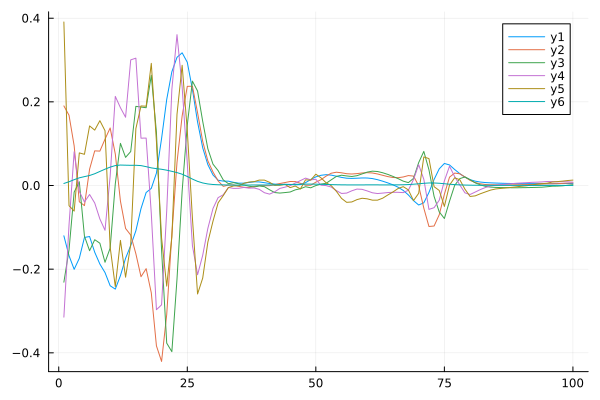

In [16]:
plot(PCA_eigvec_source_0')
plot!(nz_k5)

In [17]:
function model_pca(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    A_IA=0.25179439,
    meta=meta_3x2, files=files_3x2)

    alphas_source_0 = alphas[1:5]
    alphas_source_1 = alphas[6:10]
    alphas_source_2 = alphas[11:15]
    alphas_source_3 = alphas[16:20]
    alphas_source_4 = alphas[21:25]
    alphas_lens_0 = alphas[26:30]
    alphas_lens_1 = alphas[31:35]
    alphas_lens_2 = alphas[36:40]
    alphas_lens_3 = alphas[41:45]
    alphas_lens_4 = alphas[46:50]

    Ws_source_0 = PCA_mean_source_0 .+ PCA_chol_source_0 * alphas_source_0
    Ws_source_1 = PCA_mean_source_1 .+ PCA_chol_source_1 * alphas_source_1
    Ws_source_2 = PCA_mean_source_2 .+ PCA_chol_source_2 * alphas_source_2
    Ws_source_3 = PCA_mean_source_3 .+ PCA_chol_source_3 * alphas_source_3
    Ws_source_4 = PCA_mean_source_4 .+ PCA_chol_source_4 * alphas_source_4
    Ws_lens_0   = PCA_mean_lens_0   .+ PCA_chol_lens_0   * alphas_lens_0
    Ws_lens_1   = PCA_mean_lens_1   .+ PCA_chol_lens_1   * alphas_lens_1
    Ws_lens_2   = PCA_mean_lens_2   .+ PCA_chol_lens_2   * alphas_lens_2
    Ws_lens_3   = PCA_mean_lens_3   .+ PCA_chol_lens_3   * alphas_lens_3
    Ws_lens_4   = PCA_mean_lens_4   .+ PCA_chol_lens_4   * alphas_lens_4

    nz_source_0 = nz_k5 .+ (Ws_source_0' * PCA_eigvec_source_0)'
    nz_source_1 = nz_k6 .+ (Ws_source_1' * PCA_eigvec_source_1)'
    nz_source_2 = nz_k7 .+ (Ws_source_2' * PCA_eigvec_source_2)'
    nz_source_3 = nz_k8 .+ (Ws_source_3' * PCA_eigvec_source_3)'
    nz_source_4 = nz_k9 .+ (Ws_source_4' * PCA_eigvec_source_4)'
    nz_lens_0 = nz_k0 .+ (Ws_lens_0' * PCA_eigvec_lens_0)'
    nz_lens_1 = nz_k1 .+ (Ws_lens_1' * PCA_eigvec_lens_1)'
    nz_lens_2 = nz_k2 .+ (Ws_lens_2' * PCA_eigvec_lens_2)'
    nz_lens_3 = nz_k3 .+ (Ws_lens_3' * PCA_eigvec_lens_3)'
    nz_lens_4 = nz_k4 .+ (Ws_lens_4' * PCA_eigvec_lens_4)'

    nuisances = Dict(
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_5_b"    => lens_5_b,
        "lens_0_nz"   => nz_lens_0,
        "lens_1_nz"   => nz_lens_1,
        "lens_2_nz"   => nz_lens_2,
        "lens_3_nz"   => nz_lens_3,
        "lens_4_nz"   => nz_lens_4,
        "source_0_nz" => nz_source_0,
        "source_1_nz" => nz_source_1,
        "source_2_nz" => nz_source_2,
        "source_3_nz" => nz_source_3,
        "source_4_nz" => nz_source_4,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [18]:
Cmod_pca = make_Cmod(50, model_pca);

## GP

In [19]:
nz_path = string("../data/CosmoDC2/image_gp_", method, "_priors/")

nz_lens_0 = npzread(string(nz_path, "gp_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "gp_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "gp_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "gp_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "gp_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "gp_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "gp_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "gp_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "gp_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "gp_source_4.npz"))

zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

chol_source_0 = nz_source_0["chol"]
chol_source_1 = nz_source_1["chol"]
chol_source_2 = nz_source_2["chol"]
chol_source_3 = nz_source_3["chol"]
chol_source_4 = nz_source_4["chol"]
chol_lens_0 = nz_lens_0["chol"]
chol_lens_1 = nz_lens_1["chol"]
chol_lens_2 = nz_lens_2["chol"]
chol_lens_3 = nz_lens_3["chol"]
chol_lens_4 = nz_lens_4["chol"]

W_source_0 = nz_source_0["W"]
W_source_1 = nz_source_1["W"]
W_source_2 = nz_source_2["W"]
W_source_3 = nz_source_3["W"]
W_source_4 = nz_source_4["W"]
W_lens_0 = nz_lens_0["W"]
W_lens_1 = nz_lens_1["W"]
W_lens_2 = nz_lens_2["W"]
W_lens_3 = nz_lens_3["W"]
W_lens_4 = nz_lens_4["W"]


100×5 Matrix{Float64}:
  1.0           8.14171e-16  -2.54092e-17  -4.34207e-16  -8.384e-15
  0.472452      0.0019735    -0.00143482   -0.00248216    0.233337
 -0.0477212     0.00488619   -0.00166524   -0.002017      0.451633
 -0.532938      0.00695912   -0.000942502  -0.000534606   0.49237
 -0.836589      0.00847755    0.000293053   0.00153361    0.420699
 -1.19554       0.0112189     0.000914733  -0.000555336   0.167502
 -1.19084       0.0142097     0.00145147   -0.00358492   -0.223219
 -0.627603      0.0142592     0.00185906   -0.00488411   -0.605358
  0.0199685     0.0147884     0.00189016   -0.00542496   -0.92885
 -0.424238      0.0230357    -0.00147261   -0.0170553    -1.36885
 -1.07185       0.038885     -0.00534173   -0.0298357    -2.05241
 -1.74445       0.0548121    -0.00888245   -0.0411685    -2.67052
 -0.992445      0.0652728    -0.00767491   -0.0352262    -3.23785
  ⋮                                                      
  0.0869422    -0.00124115   -0.000112009   0.0005412

In [20]:
function nz_itp(q, nq, z)
    dq = mean(q[2:end] - q[1:end-1])
    q_range = q[1]:dq:q[end]
    nz_int = cubic_spline_interpolation(q_range, nq;
        extrapolation_bc=Line())
    return nz_int(z)
end

function model_gp(alphas; 
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    A_IA=0.25179439,
    meta=meta_3x2, files=files_3x2)

    alphas_source_0 = alphas[1:5]
    alphas_source_1 = alphas[6:10]
    alphas_source_2 = alphas[11:15]
    alphas_source_3 = alphas[16:20]
    alphas_source_4 = alphas[21:25]
    alphas_lens_0 = alphas[26:30]
    alphas_lens_1 = alphas[31:35]
    alphas_lens_2 = alphas[36:40]
    alphas_lens_3 = alphas[41:45]
    alphas_lens_4 = alphas[46:50]


    nz_lens_0 = W_lens_0 * chol_lens_0 * alphas_lens_0
    nz_lens_0 += nz_k0
    nz_lens_1 = W_lens_1 * chol_lens_1 * alphas_lens_1
    nz_lens_1 += nz_k1
    nz_lens_2 = W_lens_2 * chol_lens_2 * alphas_lens_2
    nz_lens_2 += nz_k2
    nz_lens_3 = W_lens_3 * chol_lens_3 * alphas_lens_3
    nz_lens_3 += nz_k3
    nz_lens_4 = W_lens_4 * chol_lens_4 * alphas_lens_4
    nz_lens_4 += nz_k4
    nz_source_0 = W_source_0 * chol_source_0 * alphas_source_0
    nz_source_0 += nz_k5
    nz_source_1 = W_source_1 * chol_source_1 * alphas_source_1
    nz_source_1 += nz_k6
    nz_source_2 = W_source_2 * chol_source_2 * alphas_source_2
    nz_source_2 += nz_k7
    nz_source_3 = W_source_3 * chol_source_3 * alphas_source_3
    nz_source_3 += nz_k8
    nz_source_4 = W_source_4 * chol_source_4 * alphas_source_4
    nz_source_4 += nz_k9


    nuisances = Dict(
        "lens_1_b"    => lens_1_b,
        "lens_2_b"    => lens_2_b,
        "lens_3_b"    => lens_3_b,
        "lens_4_b"    => lens_4_b,
        "lens_5_b"    => lens_5_b,
        "lens_0_nz"   => nz_lens_0,
        "lens_1_nz"   => nz_lens_1,
        "lens_2_nz"   => nz_lens_2,
        "lens_3_nz"   => nz_lens_3,
        "lens_4_nz"   => nz_lens_4,
        "source_0_nz" => nz_source_0,
        "source_1_nz" => nz_source_1,
        "source_2_nz" => nz_source_2,
        "source_3_nz" => nz_source_3,
        "source_4_nz" => nz_source_4,
        "A_IA"        => A_IA)
        
    cosmo = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    cosmo.settings.cosmo_type = eltype(valtype(alphas))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [21]:
Cmod_gp = make_Cmod(50, model_gp);

# Comp

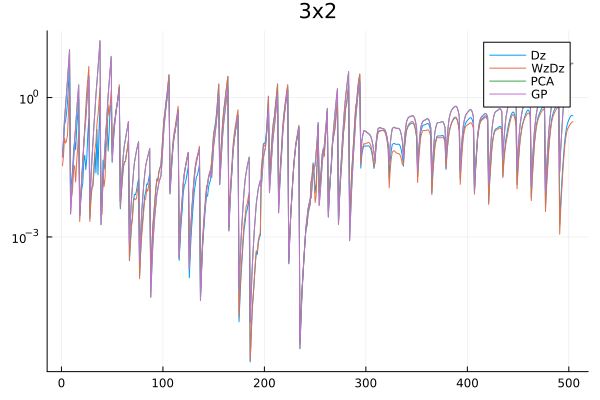

In [22]:
plot(diag(Cmod_dz) ./ diag(meta_3x2.cov), label="Dz", yscale=:log10, title="3x2")
plot!(diag(Cmod_wzdz) ./ diag(meta_3x2.cov), label="WzDz", yscale=:log10, title="3x2")
plot!(diag(Cmod_pca) ./ diag(meta_3x2.cov), label="PCA", yscale=:log10, title="3x2")
plot!(diag(Cmod_gp) ./ diag(meta_3x2.cov), label="GP", yscale=:log10, title="3x2")

## Save

In [23]:
using NPZ
npzwrite("../covs/COSMODC2/comp_covs.npz",
        Dict(
        "cov" => diag(meta_3x2.cov),
        "TT_dz" => diag(Cmod_dz),
        "TT_wzdz" => diag(Cmod_wzdz),
        "TT_pca" => diag(Cmod_pca),
        "TT_gp" => diag(Cmod_gp)))